In [1]:
import numpy as np
import pandas as pd
df=pd.read_csv("C:/Users/admin/Desktop/UCI_Credit_Card.csv")

In [2]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


# Data preprocessing 

In [3]:

df['grad_school'] = (df['EDUCATION']== 1).astype('int')
df['university'] = (df['EDUCATION']== 2).astype('int')
df['high_school'] = (df['EDUCATION']== 3).astype('int')

In [4]:
df.drop('EDUCATION',axis = 1,inplace = True)


In [5]:
df['male'] = (df['SEX'] == 1).astype(int)#male=1,female =0
df.drop('SEX',axis = 1,inplace = True)


In [6]:
df['marriage'] = (df['MARRIAGE'] == 1).astype(int)
df.drop('MARRIAGE',axis = 1,inplace = True)

In [7]:
df.head()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,grad_school,university,high_school,male,marriage
0,1,20000.0,24,2,2,-1,-1,-2,-2,3913.0,...,0.0,0.0,0.0,0.0,1,0,1,0,0,1
1,2,120000.0,26,-1,2,0,0,0,2,2682.0,...,1000.0,1000.0,0.0,2000.0,1,0,1,0,0,0
2,3,90000.0,34,0,0,0,0,0,0,29239.0,...,1000.0,1000.0,1000.0,5000.0,0,0,1,0,0,0
3,4,50000.0,37,0,0,0,0,0,0,46990.0,...,1200.0,1100.0,1069.0,1000.0,0,0,1,0,0,1
4,5,50000.0,57,-1,0,-1,0,0,0,8617.0,...,10000.0,9000.0,689.0,679.0,0,0,1,0,1,1


In [8]:
#the pay features <0 means it was not delayed,hence replace it as 0
pay_features = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
for p in pay_features:
    df.loc[df[p]<=0,p] = 0


In [9]:
df=df.rename(columns={'male': 'sex'})

In [10]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
grad_school                   0
university                    0
high_school                   0
sex                           0
marriage                      0
dtype: int64

In [11]:
df.dtypes

ID                              int64
LIMIT_BAL                     float64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
grad_school                     int32
university                      int32
high_school                     int32
sex                             int32
marriage    

# Exploratory data anlysis

In [12]:
df.describe()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,grad_school,university,high_school,sex,marriage
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,...,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,35.485500,0.356767,0.320033,0.304067,0.258767,0.22150,0.226567,51223.330900,...,5225.68150,4826.076867,4799.387633,5215.502567,0.221200,0.352833,0.467667,0.163900,0.396267,0.455300
std,8660.398374,129747.661567,9.217904,0.760594,0.801727,0.790589,0.761113,0.71772,0.715438,73635.860576,...,17606.96147,15666.159744,15278.305679,17777.465775,0.415062,0.477859,0.498962,0.370191,0.489129,0.498006
min,1.000000,10000.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-165580.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3558.750000,...,390.00000,296.000000,252.500000,117.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,22381.500000,...,1800.00000,1500.000000,1500.000000,1500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,67091.000000,...,4505.00000,4013.250000,4031.500000,4000.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,30000.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,964511.000000,...,896040.00000,621000.000000,426529.000000,528666.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df.head()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,grad_school,university,high_school,sex,marriage
0,1,20000.0,24,2,2,0,0,0,0,3913.0,...,0.0,0.0,0.0,0.0,1,0,1,0,0,1
1,2,120000.0,26,0,2,0,0,0,2,2682.0,...,1000.0,1000.0,0.0,2000.0,1,0,1,0,0,0
2,3,90000.0,34,0,0,0,0,0,0,29239.0,...,1000.0,1000.0,1000.0,5000.0,0,0,1,0,0,0
3,4,50000.0,37,0,0,0,0,0,0,46990.0,...,1200.0,1100.0,1069.0,1000.0,0,0,1,0,0,1
4,5,50000.0,57,0,0,0,0,0,0,8617.0,...,10000.0,9000.0,689.0,679.0,0,0,1,0,1,1


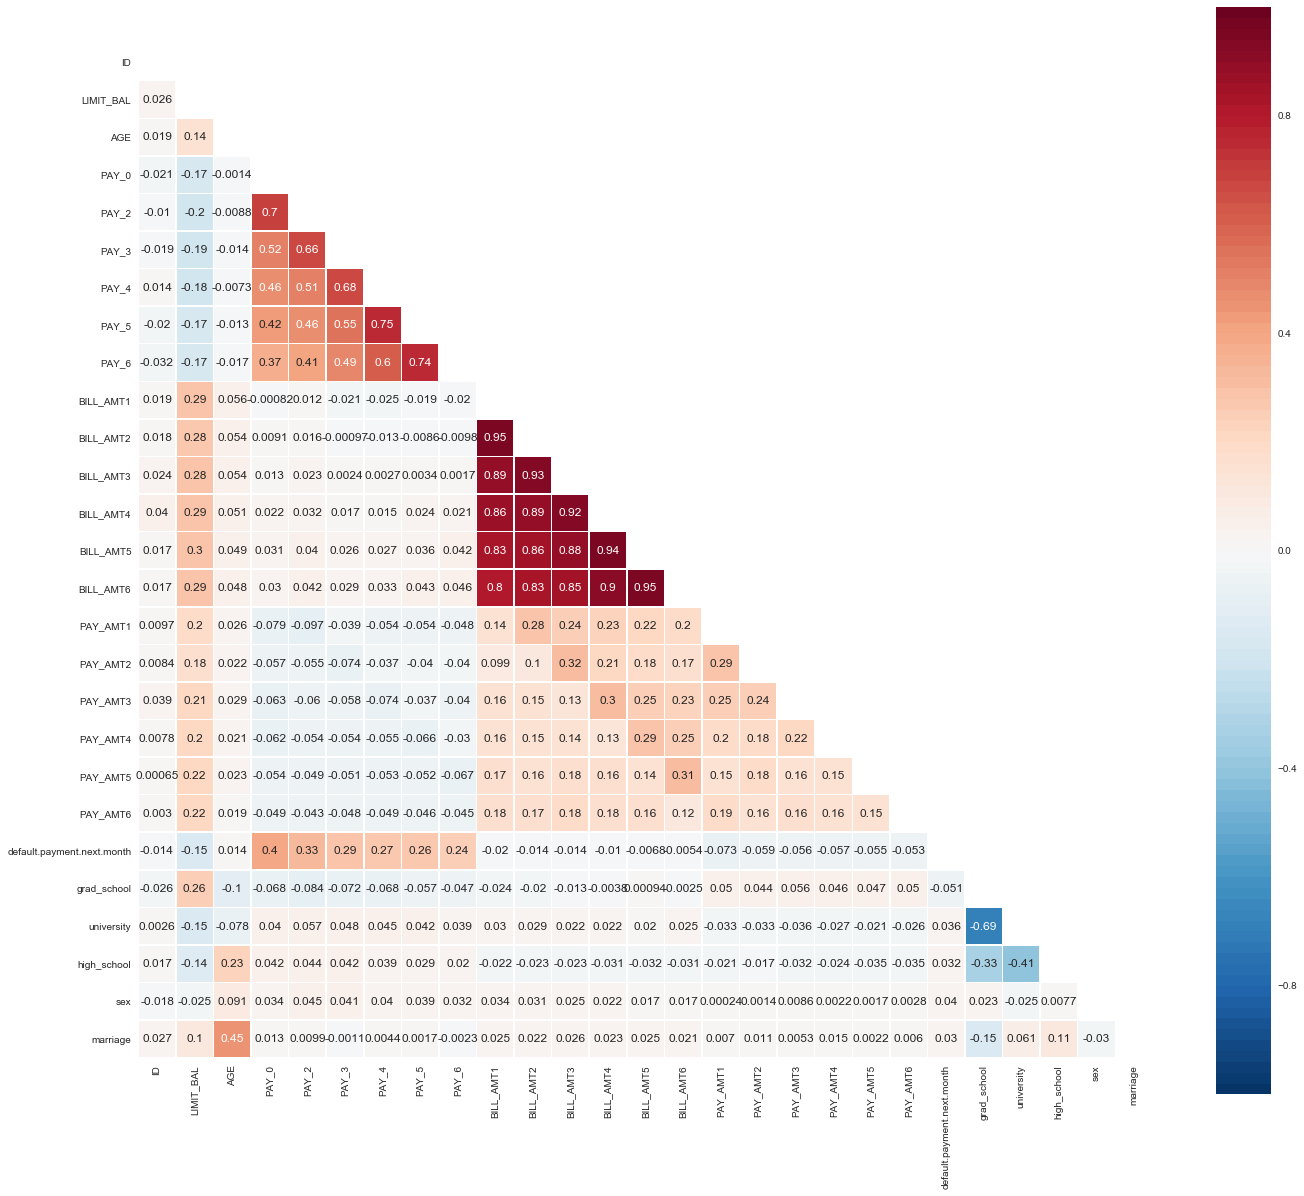

In [42]:
import matplotlib.pyplot as plt
# Create a correlation plot of both datasets.
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(50,20)) 

plt.subplot(1, 2, 1)
import seaborn as sns
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(),annot=True,vmin=-1, vmax=1,square=True,cmap=sns.color_palette("RdBu_r", 100),mask=mask,linewidths=.5)

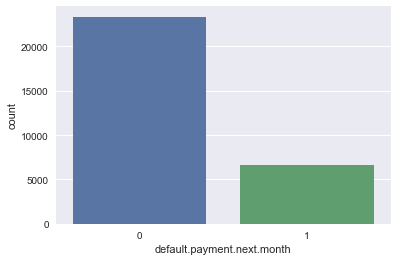

In [15]:
import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(x="default.payment.next.month", data=df)


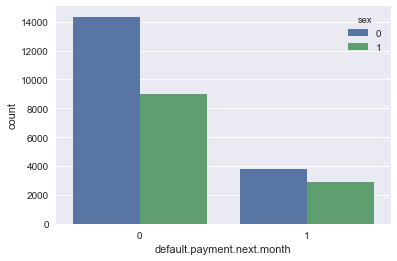

In [16]:
import seaborn as sns
sns.set(style="darkgrid")
sns.countplot(x="default.payment.next.month",hue='sex',data=df)

# Building models


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,jaccard_similarity_score,log_loss,classification_report
from sklearn.preprocessing import StandardScaler

In [18]:
X=df.drop("default.payment.next.month",axis=1)
X=StandardScaler().fit_transform(X)
y=df["default.payment.next.month"]
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size =.20,random_state=0)

# Logistic regression


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,jaccard_similarity_score,log_loss
LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(xtrain,ytrain)
pred=LR.predict(xtest)
pred[0:30]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [20]:
jaccard_similarity_score(ytest, pred)

0.821

In [21]:
confusion_matrix(ytest,pred)

array([[4521,  182],
       [ 892,  405]], dtype=int64)

In [22]:
print (classification_report(ytest, pred))

             precision    recall  f1-score   support

          0       0.84      0.96      0.89      4703
          1       0.69      0.31      0.43      1297

avg / total       0.80      0.82      0.79      6000



In [23]:
yhat_prob=LR.predict_proba(xtest)
log_loss(ytest,yhat_prob) 

0.43609742342842717

# Decision Tree 

In [24]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decision
# it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
decision.fit(xtrain,ytrain)
ypred=decision.predict(xtest)

In [26]:
ypred[0:30]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [27]:
jaccard_similarity_score(ytest, ypred)

0.8281666666666667

In [28]:
confusion_matrix(ytest,ypred)

array([[4494,  209],
       [ 822,  475]], dtype=int64)

In [29]:
print (classification_report(ytest, ypred))

             precision    recall  f1-score   support

          0       0.85      0.96      0.90      4703
          1       0.69      0.37      0.48      1297

avg / total       0.81      0.83      0.81      6000



In [30]:
yhat_proba=decision.predict_proba(xtest)
log_loss(ytest,yhat_proba) 

0.42752956700088224

# Naive bayes classification

In [31]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(xtrain,ytrain)
ypr=NB.predict(xtest)
ypr[0:30]

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [32]:
jaccard_similarity_score(ytest, ypr)

0.7716666666666666

In [33]:
confusion_matrix(ytest,ypr)

array([[3909,  794],
       [ 576,  721]], dtype=int64)

In [34]:
print (classification_report(ytest, ypr))

             precision    recall  f1-score   support

          0       0.87      0.83      0.85      4703
          1       0.48      0.56      0.51      1297

avg / total       0.79      0.77      0.78      6000



In [35]:
yhat_probabi=NB.predict_proba(xtest)
log_loss(ytest,yhat_probabi) 

1.5338832721639288

# Support vector machines

In [36]:
from sklearn import svm
s =svm.SVC(kernel='rbf',probability=True)
s.fit(xtrain,ytrain) 
yp=s.predict(xtest)

In [37]:
yp[0:30]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [38]:
confusion_matrix(ytest,yp)

array([[4496,  207],
       [ 844,  453]], dtype=int64)

In [39]:
jaccard_similarity_score(ytest, yp)

0.8248333333333333

In [40]:
print (classification_report(ytest, yp))

             precision    recall  f1-score   support

          0       0.84      0.96      0.90      4703
          1       0.69      0.35      0.46      1297

avg / total       0.81      0.82      0.80      6000



In [41]:
yhat_probabil=s.predict_proba(xtest)
log_loss(ytest,yhat_probabil) 

0.4471852028265937